

---


# #Employee Attrition Prediction Using Machine Learning with EDA


---



In [4]:
!pip install xgboost==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import ipywidgets as widgets
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.feature_selection import VarianceThreshold
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Employee Attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8




---


# #Exploratory Data Analysis


---





---


# Whats in the Data? 

Here we will see what is in the data. We will have a look at the data and see if there are any null values, duplicates, different data types and other such informatuion.

---



## Q. Number of columns and observations in the data


In [9]:
df.shape

(1470, 35)

A.
*  number of columns = 35
*  number of rows = 1470

## Q. Any missing Data?

In [10]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

A.
*  No missing values in data.

## Q. Any different datatypes involved ?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

A.
*  Numerical columns = 26
*  categorical columns = 9

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Q. What are different categories in categorical columns

In [13]:
for column in df.columns:
  if df[column].dtype == object:
    print(f"{column} : {df[column].unique()} \n\n{df[column].value_counts()}\n ----------------------------------------------------------------------------------------------------")

Attrition : ['Yes' 'No'] 

No     1233
Yes     237
Name: Attrition, dtype: int64
 ----------------------------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
 ----------------------------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources'] 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
 ----------------------------------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources 

## Q. Is there skewness in the data?

In [14]:
df.skew(axis=0)

<ipython-input-14-67a635563f0e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0)


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

## Q. What is the Distribution of Attrition?

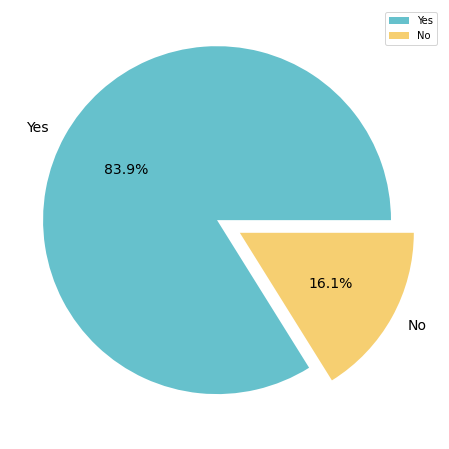

In [15]:
plt.figure(figsize=(20,8))
r = df.groupby("Attrition")['Attrition'].count()
plt.pie(r, explode=[0.05,0.1], labels = ['Yes', 'No'], autopct = "%1.1f%%", colors=['#66C1CC','#F6CF71'], textprops={'fontsize': 14})
plt.legend()
plt.title="Attrition rate in the company"
plt.show()



---


## Q. What is the Structure of the data

1. There are some columns with ordinal structure. e.g. performance rating is defined in numbers from 1 to 4 (lowest to outstanding)
2. Due to above we cannot treat it as label encoded as then the model will consider 1 as lowest importance and 4 as highest which might affect other parameters.
3. some of the columns such as Employee number, Standard hours, Employee count and Over 18 have no special information. Thus can be dropped
4. other than numerical, ordinal and categorical, there are no other data types in the dataset.
5. we can convert the ordinal data to categorical by mapping apprpriate text to the numbers. This will help us to work more easily with the data.
6. After that, we can encode the columns with One Hot Encoding. This will increase number of columns tremendously. We can handle this with PCA.
7. Our Target Variable is "Attrition" in this Dataset.
---



## Q. What is the Correlation of Numerical Features with each other?

In [16]:
df_corr = df.corr()
index = df_corr.index

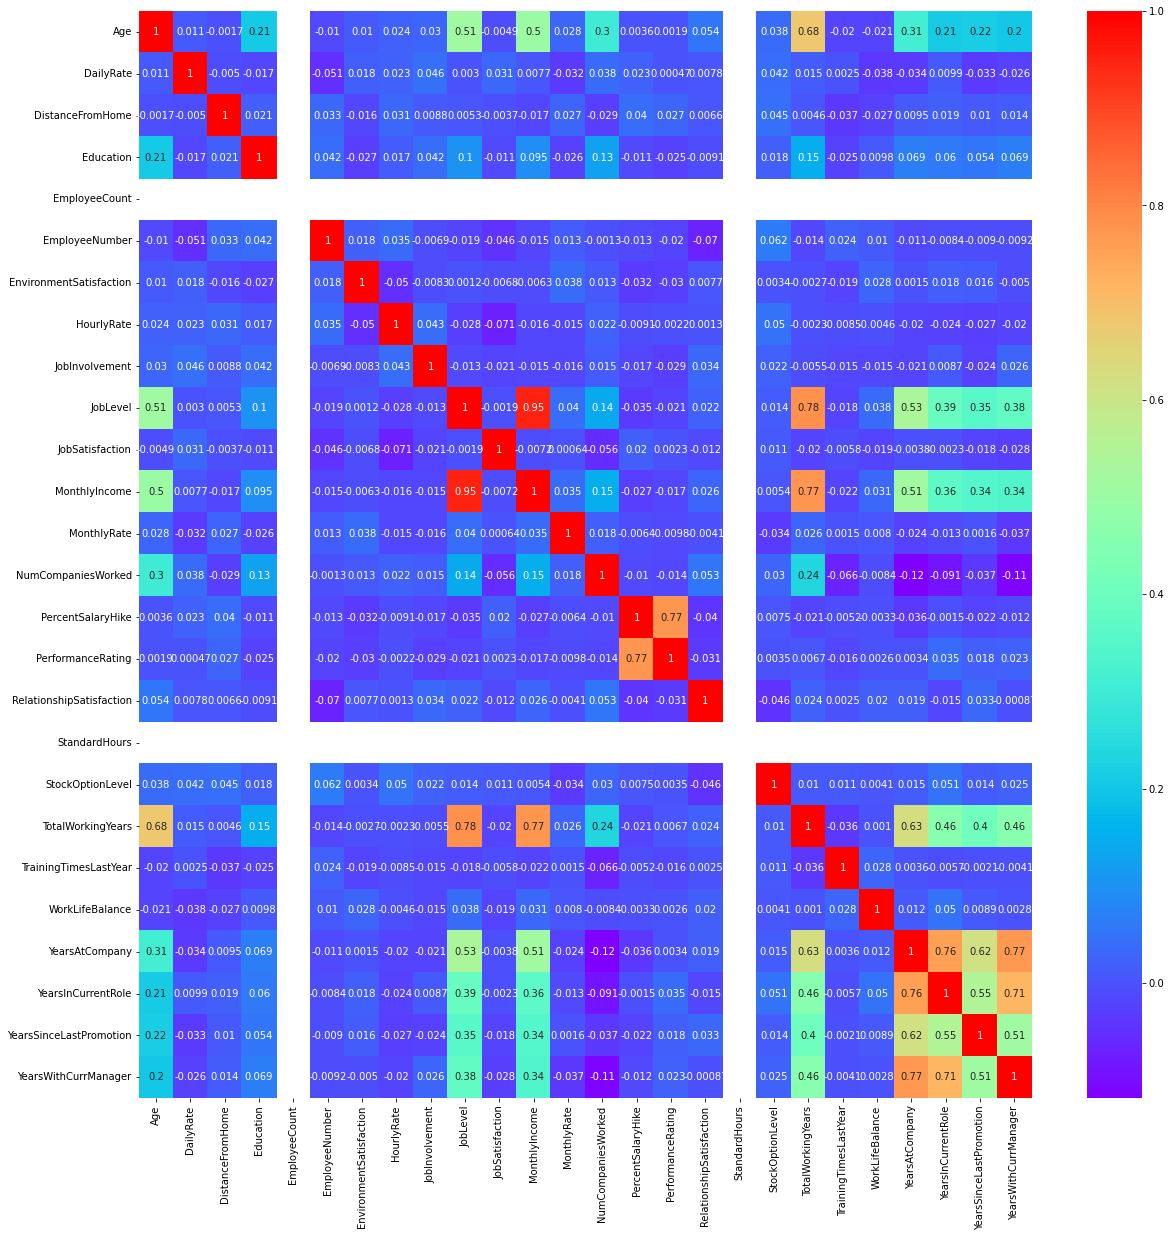

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow')



---


# Demographic Information

This section includes the information about employees such as Gender Distribution, Age distribution, Effect of these on Attrition, Avg Job Satisfaction in the company, Monthly income based on Gender, it's effect on attrition, Marital Status and it's effect on target, etc. We will try too answer some of the questions on available data.


---



## Q. What is the Distribution of Age and Gender of Employees?


In [18]:
import plotly.express as px
fig = px.histogram(df, x="Age", color="Gender",facet_col="Gender",
                   marginal="box", color_discrete_sequence=px.colors.qualitative.Pastel,
                   hover_data=df.columns, title = "Distribution of Age and Gender of Employees")
fig.show()

A. There are more number of Men than Women between the age of 25 to 50.
*   Median value of both genders is almost same from which we can infer that both classes have very similar distribution.



## Q. What is the count of both genders in Company?

In [19]:
fig = px.histogram(df, y="Gender",color_discrete_sequence=px.colors.qualitative.Pastel,
                  text_auto = True, orientation = "h", color="Gender",
                  title = "Count of Male and Female Employees")
fig.show()

## Q. What is the percentage of attrition in Men and Women?

In [20]:
fig = px.histogram(df, x="Gender", color="Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
                   hover_data=df.columns, barnorm = 'percent', orientation='v', text_auto = True,
                   title = "Distribution of Male and Female Employees asper Attrition (Percentage)")
fig.show()

A. 

* The Attrition Rate in Men and Women is approximately 17% and 14.8% respectively. 

###### Hypothesis test to validate

In [21]:
from scipy.stats import chi2_contingency
chitable = pd.crosstab(df["Attrition"],df.Gender)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\nChi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150 

Chi sq test statistic for the test is 1.117 and the p-value is 0.291

Failed to reject Null hypothesis. There is no relation between these two variables


## Q. What is the distribution of Age w.r.t attrition? 

In [22]:
fig = px.histogram(df, x="Age", color="Gender",facet_col="Attrition",marginal="box",color_discrete_sequence=px.colors.qualitative.Pastel,
                   hover_data=df.columns, barmode = "overlay", barnorm = 'percent', title = "Distribution of Age with respect to Attrition")
fig.show()

A. 

*  Here we can see that, majority of women who quit are in the age group of 18 to 49. 


###### Hypothesis test to validate

In [23]:
from scipy.stats import ttest_ind

cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['Age'], cat2['Age'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Reject Null hypothesis. There is a relation between these two variables


In [24]:
# chitable = pd.crosstab(df.Attrition,df.Age)
# stats,p,dof,expected = chi2_contingency(chitable)
# stats = round(stats, 3)
# p = round(p,3)
# print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
# if p <= 0.05:
#     print("\nReject Null hypothesis. There is a relation between these two variables")
# else:
#     print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

In [25]:
# from scipy import stats

# t_value,p_value=stats.ttest_ind(df["Age"],df["Attrition"])

# print('Test statistic is %f'%float("{:.6f}".format(t_value)))

# print('p-value for two tailed test is %f'%p_value)

# alpha = 0.05

# if p_value<=alpha:

#     print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

# effect of ammonium chloride and urea on grain yield of paddy are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

# else:

#     print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

## Q. How is the distribution of Job Satisfaction in Men and Women?

In [26]:
fig = px.box(df, x="Gender", y="JobSatisfaction", color = "Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Job Satisfaction vs Attrition in Male and Female Employees')
fig.show()

A.
1. Female Employees who left have majority of Job Satisfaction in range of 2 and 3 i.e. "Medium" to "High"
2. Female Employees who stayed have majorly voted Job Satisfaction in range of 2 to 4 i.e. "Medium" to "Very High"
3. On the other hand, Men who left have majorly voted Job Satisfaction between 1 to 3 i.e. "Low" to "High"
4. Men who stayed have mostly voted from 2 to 4 i.e. "Medium" to "Very High"

From this we can conclude that:

*   Men are Less Satisfied with the job than Women that left the Company

*   Very less number of Men and Women have voted Hihly Satisfied and still left this might be due to Age and these people might have reached Retirement stageor have taken Voluntary Retirement.



In [27]:
# Ho there is no effect of gender on Job Satisfaction
# Ha theere is effect of gender on Job Satisfaction

In [28]:
chitable = pd.crosstab(df["JobSatisfaction"],df.Gender)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Gender           Female  Male
JobSatisfaction              
1                   119   170
2                   118   162
3                   181   261
4                   170   289 

 Chi sq test statistic for the test is 2.548 and the p-value is 0.467

Failed to reject Null hypothesis. There is no relation between these two variables


In [29]:
chitable = pd.crosstab(df.JobSatisfaction,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52 

 Chi sq test statistic for the test is 17.505 and the p-value is 0.001

Reject Null hypothesis. There is a relation between these two variables


## Q. What is the distribution of Monthly Income and Gender?

In [30]:
m = df.groupby('Gender')['MonthlyIncome'].mean()
m

Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

There is negligible difference between mean salaries of both genders, safe to say there is no discrimination in Monthly Income.

In [31]:
fig = px.histogram(df, x="MonthlyIncome", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,barnorm = "percent",marginal='box', nbins=50,
                   title = "Distribution of Monthly Income accross Gender")
fig.show()

In [32]:
fig = px.histogram(df, x="MonthlyIncome", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,barmode = "overlay",marginal='box', nbins=50,
                   title = "Distribution of Monthly Income accross Gender")
fig.show()

A. 

* We can see that, Majority of Female Employees earn more than Men in the company. 

* Thereafter, there are almost equal number of employees who earn more than 12,500.

###### Hypothesis test to validate

In [33]:
from scipy.stats import ttest_ind

cat1 = df[df['Gender']=='Male']
cat2 = df[df['Gender']=='Female']

Stat, pval = ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Failed to reject Null hypothesis. There is no relation between these two variables


## Q. How is the distribution of monthly income and gender. Does it effect the Attrition in any way?

<Figure size 2160x1080 with 0 Axes>

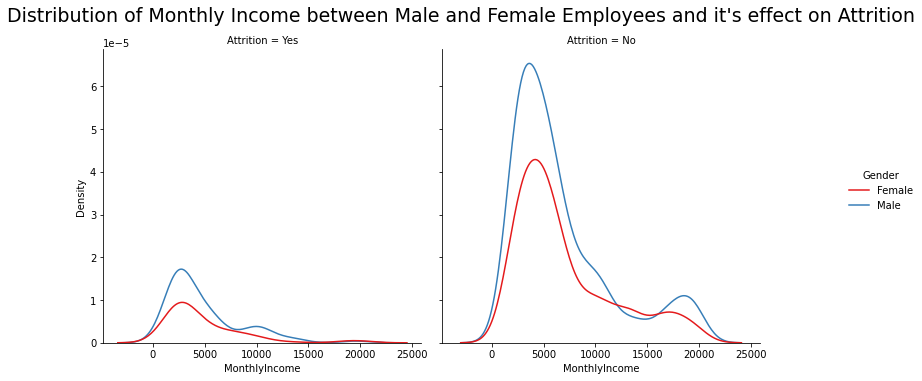

In [34]:
plt.figure(figsize=(30,15))
sns.displot(data = df, x= df["MonthlyIncome"], hue = "Gender", kind="kde", col="Attrition", palette="Set1")
plt.suptitle("Distribution of Monthly Income between Male and Female Employees and it's effect on Attrition", y=1.05, fontsize=19)
plt.show()

A. 

*  Most people who left are from the Salary range of 1,000 to 15,000.

*  From here, more Male employees have left comparatively to the female Employees.


## Q. How is type of distribution of Marital status and gender? Does it affect the attrition?

In [35]:
fig = px.histogram(df, x="Gender", color="MaritalStatus", facet_col="Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
                   hover_data=df.columns,barmode = "group",orientation='v', text_auto = True,
                   title = "Distribution of Male and Female Employees as per their Marital Status")
fig.show()

A. 

*  More number of Single Male and Female employees have left the Company.

*  Married Employees have less tendancy to quit than one who are Single.

*  Very few Employees have left who were Divorced.

###### Hypothesis test to validate

In [36]:
chitable = pd.crosstab(df.Attrition,df.MaritalStatus)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120 

 Chi sq test statistic for the test is 46.164 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. What are the different generations in the company? how does it have an impact on attrition?

In [37]:
bins= [18,22,32,50,110]
labels = ['Gen Z (18-22)','Millenials (23-32)','Gen X (33-50)','Older Gen (>50)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [38]:
fig = px.histogram(df, x="Attrition", color="AgeGroup", color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,barmode = "group",
                   title = "Generations vs Attrition")
fig.show()

A. 

*  "Millenials" and "Gen X"  i.e. Age group 23 to 32 and 33 to 50 are the most likely to quit.

*  If we compare Gen X and Millenials, There are more number of Gen X in the company and they have less tendancy to leave. 

*  So roughly we can say that Millenials are more likely to leave in this particular situation. We will have to dig up more to confirm this.

###### Hypothesis test to validate

In [39]:
chitable = pd.crosstab(df.Attrition,df.AgeGroup)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

AgeGroup   Gen Z (18-22)  Millenials (23-32)  Gen X (33-50)  Older Gen (>50)
Attrition                                                                   
No                    19                 318            746              150
Yes                   22                  96             96               23 

 Chi sq test statistic for the test is 72.903 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. what kind of distribution is there between education of employees? does it affect attrition?

In [40]:
edu = {1:"Below College", 
       2:"College",
       3:"Bachelor",
       4:"Master",
       5:"doctor"}

df['education'] = df['Education'].map(edu)

In [41]:
fig = px.histogram(df, x="Attrition", color="education", facet_col="Gender",color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,barmode = "group",
                   title = "Effect of Education of Employees on Attrition accross gender")
fig.show()

A. 

*  Most employees who left have done Bachelors in their education.

*  If we see the graph of people who didn't leave, we can see that both Male and Female employees have similar ratio of Education.

###### Hypothesis test to validate

In [42]:
chitable = pd.crosstab(df.Attrition,df.education)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

education  Bachelor  Below College  College  Master  doctor
Attrition                                                  
No              473            139      238     340      43
Yes              99             31       44      58       5 

 Chi sq test statistic for the test is 3.074 and the p-value is 0.54553

Failed to reject Null hypothesis. There is no relation between these two variables


## Q. Is there any chance that people have done education in a certain field and work in some another department and jobrole?


In [43]:
fig = px.histogram(df, x="JobRole", color="EducationField", facet_row="Department",color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,barmode = "group",width=1350, height=1000,
                   title = "Education of Employees vs Department of Employees vs Job Role of Employees")
fig.show()

A. 

*  In Sales dept, ther is highest number of people with "Marketing" education working as "Sales Executive" which is expected. However, there are many people with "life Sciences" background working as "Sales Executive" followed by "Medical" and "Technical Degree". There is no one from HR education field in this dept.

*  In Research and Development dept, highest number of people are from "Life sciences" education field working as "Research Scientist", "Laboratory Technician", Manufacturing Director", "Research Director" and "Healthcare Representative". following them are people from "Medical", "Technical Degree" and "Other". A bit high number of people from "Medical" Education are working as Managers than "Life Sciences". There is no one in this dept from education fields of "HR" and "Marketing"

*  In Human Resources dept, highest number of employees are educated in "Human Resources" field which is expected. There are a few people from other education fields working as HRs, and HR Managers.

*  Another observation is that, People from education field "Life Science" are working in all three departments. This suggests, there are many people from said education field getting hired.

## Q. People from which department left the company the mostly?

In [44]:
fig = px.histogram(df, x="JobRole", facet_col="EducationField", color='Attrition', barnorm='percent',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True, facet_row='Department',width=1350, height=1000,
                   title = "Employee Attrition based on their Education and Job Role")
fig.show()

A. 
*  People working as Laboratory technician in R&D dept, educated in Life sciences have left the most.
*  Then people who worked as Sales Executive in Sales dept educated in Marketing have left.
*  After these, people who worked in Sales dept as Sales executive while  educated in Life Sciences have left.
*  Then we see, research scientists who worked in R&D educated from Life Sciences and Medical field leaving.

###### Hypothesis test to validate

In [45]:
chitable = pd.crosstab(df.Attrition,df.EducationField)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           20            517        124      401     71   
Yes                           7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
No                           100  
Yes                           32   

 Chi sq test statistic for the test is 16.025 and the p-value is 0.00677

Reject Null hypothesis. There is a relation between these two variables


## Q. Is it true that people from older generation stayed at a job longer than other generations?

In [46]:
fig = px.histogram(df, x="NumCompaniesWorked",color="AgeGroup",barnorm = "percent",
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True, marginal='box',
                   title = "Generations vs Number of companies they have worked in past")
fig.show()

A. 
*  Here we can see that Frequent Quitters are mostly Gen X people followed by Millenials. Comparatively less number of people from Older Generation have worked with more than 5 companies in their lifetime.. 

*  Obviously Gen Z are not old yet to be frequent quitters and the graph says the same.

###### Hypothesis test to validate

In [47]:
chitable = pd.crosstab(df.NumCompaniesWorked,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition            No  Yes
NumCompaniesWorked          
0                   174   23
1                   423   98
2                   130   16
3                   143   16
4                   122   17
5                    47   16
6                    54   16
7                    57   17
8                    43    6
9                    40   12 

 Chi sq test statistic for the test is 25.744 and the p-value is 0.002

Reject Null hypothesis. There is a relation between these two variables




---


# Income Information

Here, we will have a look at the features related to income of the employees nad see how does uit affect our target variable. Monthly Income, Stock Option Level, and its affect on target variable as well as on performance of employees and Job satisfaction.

---



## Q. How does Monthly income differ accross departments? 

In [48]:
df.groupby('Department')['MonthlyIncome'].mean()

Department
Human Resources           6654.507937
Research & Development    6281.252862
Sales                     6959.172646
Name: MonthlyIncome, dtype: float64

In [49]:
fig = px.histogram(df, x="MonthlyIncome",facet_col="Department",marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,width=1450, height=500, color='Department',
                   title = "Distribution of Monthly income Department wise")
fig.show()

In [50]:
df.groupby('Department')['DailyRate'].mean()

Department
Human Resources           751.539683
Research & Development    806.851197
Sales                     800.275785
Name: DailyRate, dtype: float64

In [51]:
fig = px.histogram(df, x="DailyRate",facet_col="Department",marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,width=1450, height=500, color='Department',
                   title = "Distribution of Daily Rate Department wise")
fig.show()

In [52]:
df.groupby('Department')['HourlyRate'].mean()

Department
Human Resources           64.301587
Research & Development    66.167534
Sales                     65.520179
Name: HourlyRate, dtype: float64

In [53]:
fig = px.histogram(df, x="HourlyRate",facet_col="Department",marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True,width=1450, height=500, color='Department',
                   title = "Distribution of Hourly Rate Department wise")
fig.show()

A. 
*  Most people in the company work in R&D dept with majority working with monthly income upto 14,800. 
*  There is a huge count of people working in R&D dept in the salary range of 2,000 to 3,000.
*  Majority of people in Sales and R&D work in income range of upto 14,800. While majority of people in HR work in range of upto 17,300.

## Q. Are there people from specific department leaving because of monthly income?

In [54]:
fig = px.scatter(df, x="MonthlyIncome",orientation='v', facet_row="Attrition",facet_col="Department", 
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                   title = "Distribution of Monthly income vs Department vs Attrition", color="Attrition", symbol="Attrition")
fig.show()

A. 
*  Spread of people left from Sales dept is quite uniform accross the income range.
*  Whereas, in R&D dept, people mostly left with lower income range. majority is below 5,000.
*  Very few people left from HR and majority is low income range of upto 4,000.

###### Hypothesis test to validate

In [55]:
from scipy.stats import ttest_ind

cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Reject Null hypothesis. There is a relation between these two variables


## Q. Does Income affect Job Satisfaction?

In [56]:
fig = px.scatter(df, x="MonthlyIncome", y="PercentSalaryHike",orientation='v', facet_row="Attrition",
                 facet_col="JobSatisfaction",color_discrete_sequence=px.colors.qualitative.Pastel,
                   title = "Distribution of Monthly income vs Percent Salary Hike vs Job Satisfaction vs Attrition", color="Attrition")
fig.show()

A. 
*  The most people who quiyyed belong to the income range of 0 to 5000 and within salary hike range of 10% to 15%.
*  it seems monthly income and percent salary hike does effect attrition.

###### Hypothesis test to validate

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
new = ols('MonthlyIncome ~ JobSatisfaction', data = df).fit()
sm.stats.anova_lm(new,typ = 2)

,sum_sq,df,F,PR(>F)
JobSatisfaction,1.667698e+06,1.0,0.075193,0.783959
Residual,3.255851e+10,1468.0,NaN,NaN


There is no relation between these two variables as Pval is more than 0.05.

## Q. Does Monthly income and Performance Rating have any relation?

In [59]:
perfrat = {1:"Low", 
       2:"Good",
       3:"Excellent",
       4:"Outstanding"}

df['perfrat'] = df['PerformanceRating'].map(perfrat)

In [60]:
df.groupby('perfrat')['MonthlyIncome'].mean()

perfrat
Excellent      6537.274116
Outstanding    6313.893805
Name: MonthlyIncome, dtype: float64

In [61]:
fig = px.histogram(df, x="MonthlyIncome",marginal="box", barnorm='percent',color_discrete_sequence=px.colors.qualitative.Pastel,
                   orientation='v', text_auto = True, color="perfrat", height=800,
                   title = "Performance Rating vs Monthly Income")
fig.show()

A. 
*  There is nominal change in median of Income between people with Performance rating of "Excellent" and "Outstanding". 
*  There are very few number of people with rating of "Outstanding". 
*  Let's see if there is anything more we can observe about the performance and salary hike percent along with attrition.

###### Hypothesis test to validate

In [62]:
from scipy.stats import ttest_ind

cat1 = df[df['perfrat']=='Excellent']
cat2 = df[df['perfrat']=='Outstanding']

Stat, pval = ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Failed to reject Null hypothesis. There is no relation between these two variables


## Q. Is there any relation between Percent Salary Hike, Monthly Income and Attrition?

In [64]:
fig = px.scatter(df, x="MonthlyIncome",y="PercentSalaryHike", facet_col="perfrat", facet_row="Attrition",
                  orientation='v',color="Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Performance Rating vs Monthly Income vs Percent Salary hike vs Attrition")
fig.show()

A. 
*  We can clearly see that, people with "Outstanding" rating gets more salary hike and the attrition is also affected with it.
*  There are more people with "Excellent" rating and less salary hike leaving the company.
*  There are a few instances where, people with "Outstanding" rating left the company.
*  There are only 2 categories in Performance Rating "3" and "4" namely "Excellent" and "Outstanding" and other two are not seen any where.
*  People with higher performance rating have higher salary hike.   

###### Hypothesis test to validate

In [65]:
from scipy.stats import ttest_ind

cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['PercentSalaryHike'], cat2['PercentSalaryHike'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Failed to reject Null hypothesis. There is no relation between these two variables


## Q. How does Stock option level affect monthly salary, percent salary hike and attrition?

In [67]:
sol = {0:"Low", 
       1:"Medium",
       2:"High",
       3:"Very High"}

df['stockopt'] = df['StockOptionLevel'].map(sol)

In [68]:
fig = px.histogram(df, x="perfrat", facet_col="stockopt", barnorm = 'percent',
                  orientation='v',color="Attrition",text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Stock option level vs Performance Rating vs Attrition")
fig.show()

A. 
*  Stock option level affects Attrition as more number of people who left had level "0".
*  Peoplle with "Excellent" performance rating left more who also had lower stock option level.
*  very few people with rating "Outstanding" left with higher stock option level.

###### Hypothesis test to validate

In [69]:
chitable = pd.crosstab(df.perfrat,df.stockopt)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

stockopt     High  Low  Medium  Very High
perfrat                                  
Excellent     136  540     495         73
Outstanding    22   91     101         12 

 Chi sq test statistic for the test is 1.931 and the p-value is 0.58688

Failed to reject Null hypothesis. There is no relation between these two variables


In [218]:
chitable = pd.crosstab(df.Attrition,df.stockopt)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

stockopt   High  Low  Medium  Very High
Attrition                              
No          146  477     540         70
Yes          12  154      56         15 

 Chi sq test statistic for the test is 60.598 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables




---

# Work Culture


In this section, we will see what do the employees feel about the work culture of the company and how does that effect our target variable.


---



## Q. How many people in each jobrole?


In [70]:
fig = px.histogram(df, x="JobRole",text_auto = True,
                  orientation='v',color="JobRole",color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Number of people in each job role")
fig.show()

## Q. What is Average salary by Job Role?

In [71]:
df2 = pd.DataFrame()
df2 = df.groupby('JobRole').agg({'MonthlyIncome':'mean'})
df2 = df2.reset_index()

In [72]:
fig = px.histogram(df2, x="JobRole",y="MonthlyIncome", text_auto = True,
                  orientation='v',color="JobRole",color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Job role wise Average Salary").update_xaxes(categoryorder='total descending')
fig.show()

## Q. Is there any relation of Attrition with Job role?

In [73]:
fig = px.histogram(df, x="JobRole",color_discrete_sequence=px.colors.qualitative.Pastel,
                  orientation='v',color="Attrition",text_auto = True, barnorm = 'percent',
                  title = "Job Role vs Attrition")
fig.show()

A. 
*  Top 4 job roles from where people left are "Laboratory Technician", "Sales executive", "Recearch Scientist" and "Sales Representative". 

###### Hypothesis test to validate

In [74]:
chitable = pd.crosstab(df.Attrition,df.JobRole)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               122               40                    197   
Yes                                9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No              97                     135                 78   
Yes              5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        245              269                    50  
Yes                        47               57                    33   

 Chi sq test statistic for the test is 86.19 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two v

## Q. Is there any relation of Attrition with Years with Current Manager and Job Satisfaction?

In [75]:
fig = px.histogram(df,x="YearsWithCurrManager", facet_row="Attrition",facet_col="JobSatisfaction",
                  orientation='v',color="Attrition",text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Job satisfaction vs Years with Current Manager vs Attrition")
fig.show()

A. 
*  Most people who left spent less years with their current managers.
*  People with less job satisfaction (1) left mostly.
*  Most of the people who spent 2 years with current manager voted higher Job Satisfaction.

###### Hypothesis test to validate

In [76]:
cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['YearsWithCurrManager'], cat2['YearsWithCurrManager'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Reject Null hypothesis. There is a relation between these two variables


## Q. Does Year from last promotion affect Attrition?

In [77]:
fig = px.histogram(df,x="YearsSinceLastPromotion",facet_col="Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
                  orientation='v',color="Attrition",text_auto = True, marginal = 'box',
                  title = "Job satisfaction vs Years since Last Promotion vs Attrition")
fig.show()

A. 
*  From above graph, it does not look like year from last promotion affect Attrition.
*  Most people who left are those who got promoted the same year and didn't even complete a year after promotion.
*  This might be a clue that people leave soon after they get a promotion and not because they didn't get promotion in last say 5 years.


###### Hypothesis test to validate

In [78]:
cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['YearsSinceLastPromotion'], cat2['YearsSinceLastPromotion'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Failed to reject Null hypothesis. There is no relation between these two variables


##  Q. Does newer employees get paid more or the older ones?

In [79]:
df2 = df.groupby('YearsAtCompany').agg({'MonthlyIncome':'mean'})
df2 = df2.reset_index()

In [80]:
fig = px.bar(df2, x="YearsAtCompany",y="MonthlyIncome", text_auto = True,
             color_discrete_sequence=px.colors.qualitative.Pastel,
                  orientation='v', 
                  title = "Years at company wise Average Salary")

fig.show()

A. 
*  It seems that Monthly income increases after spending atleast 18 years. this suggests that older people are paid more than new people.

###### Hypothesis test to validate

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
new = ols('YearsAtCompany ~ MonthlyIncome', data = df).fit()
sm.stats.anova_lm(new,typ = 2)

,sum_sq,df,F,PR(>F)
MonthlyIncome,14583.362065,1.0,527.890972,4.819314e-100
Residual,40554.539975,1468.0,NaN,NaN


Here, the P-Value is less than 0.05. Thus, there is a relation between monthly income and years at company which is quite logical.

## Q. Does Environment Satisfaction affect Attrition?

In [83]:
fig = px.histogram(df,x="EnvironmentSatisfaction",facet_col="Attrition",color_discrete_sequence=px.colors.qualitative.Pastel,
                  orientation='v',color="Attrition",text_auto = True, marginal = 'box',
                  title = "Environment satisfaction vs Attrition")
fig.show()

A. 
*  There is very nominal difference in number of votes for Environmental Satisfaction from people who left.
*  However, the people who did not left have given votes as 'High' and 'Very High' majorly.
*  This suggests that if the votes of a person is high for environmental satisfaction, they will be less likely to leave.

###### Hypothesis test to validate

In [84]:
chitable = pd.crosstab(df.Attrition,df.EnvironmentSatisfaction)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       212  244  391  386
Yes                       72   43   62   60 

 Chi sq test statistic for the test is 22.504 and the p-value is 5e-05

Reject Null hypothesis. There is a relation between these two variables


## Q. What is the Distribution of Job involvement accross employees? How does it affect Attrition?

In [85]:
jobinvol = {1:"Low", 
       2:"Medium",
       3:"High",
       4:"Very High"}

df['jobnvol'] = df['JobInvolvement'].map(jobinvol)

joblev = {1:"Junior", 
       2:"Mid Junior",
       3:"Senior",
       4:"Manager",
       5:"Executive"}

df['joblev'] = df['JobLevel'].map(joblev)



In [86]:
fig = px.histogram(df, x="joblev", text_auto = True, facet_col="jobnvol",
                  barnorm='percent',color_discrete_sequence=px.colors.qualitative.Pastel,
                  orientation='v',color="Attrition", 
                  title = "Job Involvement in percent across job levels")

fig.show()

A. 
*  Job Involvement does affect attrition. 
*  If the employees have voted low job involvement, they may quit soon. 
*  Senior, Executive and Manager employees attrition decreases if they are kept busy. (i.e. as involvement increases, attrition decreases)

###### Hypothesis test to validate

In [87]:
chitable = pd.crosstab(df.Attrition,df.joblev)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

joblev     Executive  Junior  Manager  Mid Junior  Senior
Attrition                                                
No                64     400      101         482     186
Yes                5     143        5          52      32 

 Chi sq test statistic for the test is 72.529 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. How does Performance rating and Job Involvement affect Attrition?

In [88]:
fig = px.histogram(df, x="jobnvol",orientation='v', facet_col="perfrat", barnorm='percent', 
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel,
                   title = "Distribution of Performance Rating vs Job Involvement vs Attrition", color="Attrition")
fig.show()

A.
*  Highest attrition is when performance rating is given Excellent or Outstanding and Job involvement is low.
*  Second highest attrition is when involvement is medium.

###### Hypothesis test to validate

In [89]:
chitable = pd.crosstab(df.Attrition,df.jobnvol)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

jobnvol    High  Low  Medium  Very High
Attrition                              
No          743   55     304        131
Yes         125   28      71         13 

 Chi sq test statistic for the test is 28.492 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. What is the distribution of over time vs Attrition?

In [90]:
fig = px.sunburst(df,  path=['OverTime', 'Attrition'], title='Attrition percent with respect to Over Time',
                  color='Attrition',color_discrete_sequence=px.colors.qualitative.Pastel,hover_data=['OverTime'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(uniformtext=dict(minsize=20, mode='hide'))
# fig.update_layout(coloraxis_colorbar_title='Your title')
fig.show()

A. 
*  As expected, there are more than 30% employees who left while working in Overtime.
*  Surprisingly there are 10% of people who left while they didn't had any overtime.

###### Hypothesis test to validate

In [91]:
chitable = pd.crosstab(df.Attrition,df.OverTime)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127 

 Chi sq test statistic for the test is 87.564 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. What is the effect of overtime on job involvement, performance rating and attrition?

In [92]:
fig = px.histogram(df, x="jobnvol",orientation='v', facet_col="perfrat", barnorm='percent', width=1400, height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, facet_row="Attrition",
                   title = "Distribution of Overtime on Performance Rating vs Job Involvement vs Attrition", color="OverTime")
fig.show()

A. 
*  This plot has now revealed a lot of information about the people quitting.
*  If we see closely, the attrition is more than 40% when people have to work overtime.
*  This is a big red signal to look for. 

###### Hypothesis test to validate

In [216]:
chitable = pd.crosstab(df.OverTime,df.jobnvol)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

jobnvol   High  Low  Medium  Very High
OverTime                              
No         623   58     270        103
Yes        245   25     105         41 

 Chi sq test statistic for the test is 0.157 and the p-value is 0.98426

Failed to reject Null hypothesis. There is no relation between these two variables


In [217]:
chitable = pd.crosstab(df.OverTime,df.perfrat)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

perfrat   Excellent  Outstanding
OverTime                        
No              893          161
Yes             351           65 

 Chi sq test statistic for the test is 0.008 and the p-value is 0.93047

Failed to reject Null hypothesis. There is no relation between these two variables


## Q. How does overtime affect the attrition on various departments and job roles?

In [93]:
fig = px.histogram(df, x="JobRole",orientation='v', facet_col="Department", barnorm='percent', width=1400, height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, facet_row="Attrition",
                   title = "Distribution of Overtime on Department vs Job Role vs Attrition", color="OverTime")
fig.show()

A. 
*  This plot is now revealing the people who quit because of overtime by showing us their departments and jobroles.
*  All the R&D Managers left and all of them had to work overtime.
*  Most of the attrition is from R&D dept. 

###### Hypothesis test to validate

In [94]:
chitable = pd.crosstab(df.OverTime,df.Department)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Department  Human Resources  Research & Development  Sales
OverTime                                                  
No                       46                     690    318
Yes                      17                     271    128 

 Chi sq test statistic for the test is 0.094 and the p-value is 0.95428

Failed to reject Null hypothesis. There is no relation between these two variables


In [95]:
chitable = pd.crosstab(df.OverTime,df.JobRole)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,5)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

JobRole   Healthcare Representative  Human Resources  Laboratory Technician  \
OverTime                                                                      
No                               94               39                    197   
Yes                              37               13                     62   

JobRole   Manager  Manufacturing Director  Research Director  \
OverTime                                                       
No             75                     106                 57   
Yes            27                      39                 23   

JobRole   Research Scientist  Sales Executive  Sales Representative  
OverTime                                                             
No                       195              232                    59  
Yes                       97               94                    24   

 Chi sq test statistic for the test is 6.568 and the p-value is 0.58383

Failed to reject Null hypothesis. There is no relation between these tw

In [96]:
fig = px.histogram(df,orientation='v', x="Gender", barnorm='percent', width=1400, height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, facet_row="Attrition",
                   title = "Distribution of Overtime on Gender vs Attrition", color="OverTime")
fig.show()

## Q. Does number of trainings given previous year have any effect on attrition?

In [97]:
fig = px.histogram(df,orientation='v', x="TrainingTimesLastYear", barnorm='percent', marginal='box',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Training Times Last Year on Attrition")
fig.show()

A.
*  As number of trainings increase, the attrition reduces slightly.
*  More than 27% of people left who did not receive any training in last year.

###### Hypothesis test to validate

In [98]:
chitable = pd.crosstab(df.TrainingTimesLastYear,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition               No  Yes
TrainingTimesLastYear          
0                       39   15
1                       62    9
2                      449   98
3                      422   69
4                       97   26
5                      105   14
6                       59    6 

 Chi sq test statistic for the test is 15.146 and the p-value is 0.019

Reject Null hypothesis. There is a relation between these two variables


## Q. How is job satisfaction 

In [99]:
job = {1:"Low", 
       2:"Medium",
       3:"High",
       4:"Very High"}

df['jobsat'] = df['JobSatisfaction'].map(job)

In [100]:
fig = px.histogram(df,orientation='v', x="jobsat", facet_col='joblev',facet_row='Department',barnorm='percent', height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Job satisfaction on Attrition")
fig.show()

A.
*  Here, Attrition is more in Juniors as majority votes from juniors are for low and medium job satisfaction

###### Hypothesis test to validate

In [215]:
chitable = pd.crosstab(df.jobsat ,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition   No  Yes
jobsat             
High       369   73
Low        223   66
Medium     234   46
Very High  407   52 

 Chi sq test statistic for the test is 17.505 and the p-value is 0.001

Reject Null hypothesis. There is a relation between these two variables


## Q. How is Relationship satisfaction distributed in the company?

In [101]:
rel= {1:"Low", 
       2:"Medium",
       3:"High",
       4:"Very High"}

df['relsat'] = df['RelationshipSatisfaction'].map(rel)

In [102]:
fig = px.histogram(df,orientation='v', x="relsat", barnorm='percent', facet_col='joblev', facet_row='Department',height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Relationship satisfaction on Attrition")
fig.show()

A.
*  Juniors in sales dept are mostly quitting

###### Hypothesis test to validate

In [103]:
chitable = pd.crosstab(df.RelationshipSatisfaction,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition                  No  Yes
RelationshipSatisfaction          
1                         219   57
2                         258   45
3                         388   71
4                         368   64 

 Chi sq test statistic for the test is 5.241 and the p-value is 0.155

Failed to reject Null hypothesis. There is no relation between these two variables


## Q. How is Environment Satisfaction distributed in the company?

In [104]:
env = {1:"Low", 
       2:"Medium",
       3:"High",
       4:"Very High"}

df['envsat'] = df['EnvironmentSatisfaction'].map(env)

In [105]:
fig = px.histogram(df,orientation='v', x="envsat", barnorm='percent', facet_col='joblev',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Environment satisfaction on Attrition")
fig.show()

A.
*  Most juniors are not satisfied with the environment, thus the attrition rate is higher than others.

###### Hypothesis test to validate

In [212]:
chitable = pd.crosstab(df.envsat,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition   No  Yes
envsat             
High       391   62
Low        212   72
Medium     244   43
Very High  386   60 

 Chi sq test statistic for the test is 22.504 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


## Q. What is the effect of Work life balance score on attrition?

In [106]:
wlb = {1:"Bad", 
       2:"Good",
       3:"Better",
       4:"Best"}

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(wlb)

In [107]:
fig = px.histogram(df,orientation='v', x="WorkLifeBalance", barnorm='percent',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Work Life Balance on Attrition")
fig.show()

A. 
*  Bad Work life balance score obviously has more negative impact on attrition.

###### Hypothesis test to validate

In [108]:
chitable = pd.crosstab(df.WorkLifeBalance,df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition         No  Yes
WorkLifeBalance          
Bad               55   25
Best             126   27
Better           766  127
Good             286   58 

 Chi sq test statistic for the test is 16.325 and the p-value is 0.001

Reject Null hypothesis. There is a relation between these two variables


## Q. How is the distribution of work life balance on employees of different departments and job roles and the attrition?

In [109]:
fig = px.histogram(df,orientation='v', x="WorkLifeBalance", 
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="WorkLifeBalance",
                   title = "Distribution of Work Life Balance across employees")
fig.show()

In [110]:
fig = px.histogram(df,orientation='v', x="joblev", barnorm='percent', facet_col='Department', facet_row='Attrition',width=1400, height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="WorkLifeBalance",
                   title = "Distribution of Training Times Last Year on Attrition")
fig.show()

A. 
*  There is highest number of votes given to "Better" as work life balance.
*  There is a good thing that "Bad" is the least time voted category.
*  Sales Manager is the job role where 25% of employees have bad work life balance.
*  Senior HR employees are ones who have a great work life balance as 50% of them have voted "Best"

## Q. Does work life balance gets affected by distance of office from employees homes?

In [111]:
fig = px.histogram(df,orientation='v', x="DistanceFromHome", facet_row="WorkLifeBalance",height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="WorkLifeBalance",
                   title = "Distribution of Work life balance accross distance of office from their home")
fig.show()

A. 
*  Although employees travel from long distance, vary few have voted bad for work life balance.
*  Most have Better work life balance.

In [112]:
new = ols('DistanceFromHome ~ WorkLifeBalance', data = df).fit()
sm.stats.anova_lm(new,typ = 2)

,sum_sq,df,F,PR(>F)
WorkLifeBalance,145.835675,3.0,0.739274,0.528627
Residual,96398.682012,1466.0,NaN,NaN


####  There is no relation between these two variables Pval is more than 0.05.

## Q. Does attrition gets affected with years since last promotion accross departments?

In [113]:
fig = px.histogram(df,orientation='v', x="YearsSinceLastPromotion", barnorm='percent', facet_row="Department", height=1200,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Attrition based on number of years from last promotion across departments")
fig.show()

A.
*  Attrition is slightly increasing with number of years increase since last promotion.
*  This indicates that the employees might have quit if they are not promoted for several years.

In [114]:
new = ols('YearsSinceLastPromotion ~ Attrition', data = df).fit()
sm.stats.anova_lm(new,typ = 2)

,sum_sq,df,F,PR(>F)
Attrition,16.630709,1.0,1.602218,0.20579
Residual,15237.548883,1468.0,NaN,NaN


#### P-Val is more than 0.05. Thus, there is no relation between these variables.

## Q. How is the distribution of Year since last promotion across different job levels

In [115]:
fig = px.histogram(df,orientation='v', x="YearsSinceLastPromotion", barmode='relative', marginal='box', 
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="joblev",
                   title = "Distribution of Year since last promotion across different job levels")
fig.show()

A.
*  Majority of Juniors and Mid Juniors had their last promotion one year ago. But there are a few employees who had their last promotion as long as 13 to 15 years ago.
*  Most of the Senior employees and Executives had their last promotion 2 years ago.
*  Whereas most Managers had theirs about 3 years ago.

## Q. How many employees got promotion in current year?

In [116]:
s = df[df['YearsSinceLastPromotion'] == 0]
b = len(s)/len(df)*100
x=round(b,2)
print(f'{x}% is the promotion rate in current year')

39.52% is the promotion rate in current year


A. 
*  Approx 39.5% people got promotion this year in form of job promotion or new hiring combined.

## Q. How is the distribution of Year since last promotion across different Job Roles?

In [117]:
fig = px.histogram(df,orientation='v', x="YearsSinceLastPromotion", marginal='box', barnorm='percent', color='JobRole', 
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, height=800, width=1400,
                   title = "Distribution of Work life balance accross distance of office from their home")
fig.show()

A. 
*  Employees working as Human Resources, Healthcare Representatives, Research Directors, Manufacturing Directors, Lab Technicians, Research Scientists and sales Executives had their promotion 1 year ago.
*  Whereas, most of Sales Representatives had their promotiom less than an year ago.
*  Majority of managers had their promotion about 4 years ago.

## Q. Does monthly income differs for employees working overtime across job levels?

In [118]:
fig = px.histogram(df,orientation='v', x="MonthlyIncome", marginal='box', barnorm='percent', facet_col='joblev', facet_row="Attrition",
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="OverTime", 
                   title = "Distribution of Work life balance accross distance of office from their home")
fig.show()

A.
*  Junior people have almost no difference in monthly income whether they work overtime or not.
*  Mid junior people have slightly more income if they work overtime.
*  Senior people have even more income if they work over time.
*  Managers surprisingly earn more if they dont work over time.
*  Executives earn slightly more if they work overtime.

## Q. Does Daily Rate differs for employees working overtime across job levels?

In [119]:
fig = px.histogram(df,orientation='v', x="DailyRate", marginal='box', barnorm='percent',facet_col='joblev', facet_row="Attrition",
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="OverTime",
                   title = "Distribution of Daily Rate accross different job levels")
fig.show()

A.
*  Daily rate for junior, mid junior people is  slightly more for overtime.
*  Daily rate for senior employees and managers earn considerably more if they don't work overtime.
*  Executives earn more if they work overtime.

## Q. Does Hourly Rate differs for employees working overtime across job levels?

In [120]:
fig = px.histogram(df,orientation='v', x="HourlyRate", marginal='box', barnorm='percent',facet_col='joblev', facet_row="Attrition",
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="OverTime",
                   title = "Distribution of Hourly Rate accross employees working overtime vs attrition")
fig.show()

A. 
*  From above observations, we can see that there is very negligible difference between the people who have to work over time vs the people who do not work over time.




---


# Other Factors affecting Attrition


This section shows how other factors such as Distance of home to office, business travel frequency affect the target variable and other features. 

---



## Q. How is Attrition linked with distance of employees home to office?

In [121]:
fig = px.histogram(df,orientation='v', x="DistanceFromHome", barnorm='percent', marginal='box',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Attrition accross distance of office from their home")
fig.show()

A.
*  Attrition does get affected if the employees live far away from office. 
*  From all the employees that left, more of them were from living a bit far.

###### Hypothesis test to validate

In [122]:
from scipy.stats import ttest_ind

cat1 = df[df['Attrition']=='Yes']
cat2 = df[df['Attrition']=='No']

Stat, pval = ttest_ind(cat1['DistanceFromHome'], cat2['DistanceFromHome'])
if pval <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")


Reject Null hypothesis. There is a relation between these two variables


## Q. How does attrition gets affected by distance of home from office and job roles?

In [123]:
fig = px.histogram(df,orientation='v', x="DistanceFromHome", marginal='box', facet_row='JobRole', height=2000, barnorm='percent',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of Attrition accross distance of office from their home vs attrition")
fig.show()

## Q. How does attrition gets affected by distance of home from office and job level?

In [124]:
fig = px.histogram(df,orientation='v', x="DistanceFromHome", marginal='box', facet_row='joblev', height=800,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition", barnorm='percent',
                   title = "Distribution of Attrition accross distance of office from their home vs Job levels")
fig.show()

A.
*  Attrition is more in junior employees who live far away from office. there is also a fact that juniors leave even if they live near to the office but comparatively less than those who live far away.
*  Other employees also quit more often iff they live far away.

## Q. What is the effect of business travel frequency on attrition across departments?

In [125]:
fig = px.histogram(df,orientation='v', x="BusinessTravel", marginal='box', barnorm='percent', facet_col='Department',
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition",
                   title = "Distribution of travel frequency on attrition across departments")
fig.show()

A.
*  Most people who quit have frequent business travel.

###### Hypothesis test to validate

In [197]:
chitable = pd.crosstab(df.BusinessTravel == "Travel_Frequently",df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition         No  Yes
BusinessTravel           
False           1025  168
True             208   69 

 Chi sq test statistic for the test is 18.697 and the p-value is 0.0

Reject Null hypothesis. There is a relation between these two variables


In [198]:
chitable = pd.crosstab(df.BusinessTravel == "Travel_Rarely",df.Attrition)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Attrition        No  Yes
BusinessTravel          
False           346   81
True            887  156 

 Chi sq test statistic for the test is 3.317 and the p-value is 0.069

Failed to reject Null hypothesis. There is no relation between these two variables


In [199]:
chitable = pd.crosstab(df.BusinessTravel == "Non_Travel",df.Department)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

Department      Human Resources  Research & Development  Sales
BusinessTravel                                                
False                        63                     961    446 

 Chi sq test statistic for the test is 0.0 and the p-value is 1.0

Failed to reject Null hypothesis. There is no relation between these two variables


## Q. how is the distribution of business travel across job rols?

In [201]:
fig = px.histogram(df,orientation='v', x="Department", barnorm='percent', facet_col='JobRole',width=2500,
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="BusinessTravel",
                   title = "Distribution of Business Travel across Job roles.")
fig.show()

A.
*  Sales representatives are the most frequent travellers across all job roles. But Sales managers travel rarely.
*  All other department and job roles have less travel opportunities.

###### Hypothesis test to validate

In [204]:
chitable = pd.crosstab(df.BusinessTravel,df.JobRole)
stats,p,dof,expected = chi2_contingency(chitable)
stats = round(stats, 3)
p = round(p,3)
print(chitable, f"\n\n Chi sq test statistic for the test is {stats} and the p-value is {p}")
if p <= 0.05:
    print("\nReject Null hypothesis. There is a relation between these two variables")
else:
    print("\nFailed to reject Null hypothesis. There is no relation between these two variables")

JobRole            Healthcare Representative  Human Resources  \
BusinessTravel                                                  
Non-Travel                                15                4   
Travel_Frequently                         26               10   
Travel_Rarely                             90               38   

JobRole            Laboratory Technician  Manager  Manufacturing Director  \
BusinessTravel                                                              
Non-Travel                            28       12                      13   
Travel_Frequently                     51       13                      29   
Travel_Rarely                        180       77                     103   

JobRole            Research Director  Research Scientist  Sales Executive  \
BusinessTravel                                                              
Non-Travel                         6                  28               39   
Travel_Frequently                 12                  54 

## Q. Does attrition get affected by business travel and monthly income? 

In [130]:
fig = px.histogram(df,orientation='v', x="MonthlyIncome", marginal='box', barnorm='percent', facet_row="BusinessTravel", 
                   text_auto = True,color_discrete_sequence=px.colors.qualitative.Pastel, color="Attrition", height=800,
                   title = "Distribution of Attrition across business travel  ")
fig.show()

A.
*  Attrition rate uis more when people travel frequently and are not paid more.
*  Most attrition is when empoyees travel moe frequently.

###### Hypothesis test to validate

In [206]:
new = ols('MonthlyIncome ~ BusinessTravel', data = df).fit()
sm.stats.anova_lm(new,typ = 2)

,sum_sq,df,F,PR(>F)
BusinessTravel,4.941757e+07,2.0,1.114948,0.32821
Residual,3.251076e+10,1467.0,NaN,NaN


There is no relation between these two variables as Pval is more than 0.05.



---


# #Feature Engineering

This section will help us organise our data in order to go ahead with the Machine Learning process.

---



In [132]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,Bad,6,4,0,5,Gen X (33-50),College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,Better,10,7,1,7,Gen X (33-50),Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,Better,0,0,0,0,Gen X (33-50),College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,Better,8,7,3,0,Gen X (33-50),Master,Excellent,Low,High,Junior,High,High,Very High
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,Better,2,2,2,2,Millenials (23-32),Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,Better,5,2,0,3,Gen X (33-50),College,Excellent,Medium,Very High,Mid Junior,Very High,High,High
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,Better,7,7,1,7,Gen X (33-50),Below College,Excellent,Medium,Medium,Senior,Low,Low,Very High
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,Better,6,2,0,3,Millenials (23-32),Bachelor,Outstanding,Medium,Very High,Mid Junior,Medium,Medium,Medium
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,Good,9,6,0,8,Gen X (33-50),Bachelor,Excellent,Low,Medium,Mid Junior,Medium,Very High,Very High


#### **Dropping the features which we have already encoded.**

In [133]:
df = df.drop(["Education", "PerformanceRating", "StockOptionLevel", "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction", "EnvironmentSatisfaction"], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,94,Sales Executive,Single,5993,19479,8,Y,Yes,11,80,8,0,Bad,6,4,0,5,Gen X (33-50),College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,61,Research Scientist,Married,5130,24907,1,Y,No,23,80,10,3,Better,10,7,1,7,Gen X (33-50),Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,92,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,80,7,3,Better,0,0,0,0,Gen X (33-50),College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,56,Research Scientist,Married,2909,23159,1,Y,Yes,11,80,8,3,Better,8,7,3,0,Gen X (33-50),Master,Excellent,Low,High,Junior,High,High,Very High
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,40,Laboratory Technician,Married,3468,16632,9,Y,No,12,80,6,3,Better,2,2,2,2,Millenials (23-32),Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,1,2061,Male,41,Laboratory Technician,Married,2571,12290,4,Y,No,17,80,17,3,Better,5,2,0,3,Gen X (33-50),College,Excellent,Medium,Very High,Mid Junior,Very High,High,High
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,1,2062,Male,42,Healthcare Representative,Married,9991,21457,4,Y,No,15,80,9,5,Better,7,7,1,7,Gen X (33-50),Below College,Excellent,Medium,Medium,Senior,Low,Low,Very High
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,1,2064,Male,87,Manufacturing Director,Married,6142,5174,1,Y,Yes,20,80,6,0,Better,6,2,0,3,Millenials (23-32),Bachelor,Outstanding,Medium,Very High,Mid Junior,Medium,Medium,Medium
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,1,2065,Male,63,Sales Executive,Married,5390,13243,2,Y,No,14,80,17,3,Good,9,6,0,8,Gen X (33-50),Bachelor,Excellent,Low,Medium,Mid Junior,Medium,Very High,Very High


#### **Separating the X and Y from all the data**

In [134]:
Y=df['Attrition']
X=df.drop(['Attrition'],axis=1)

In [135]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,94,Sales Executive,Single,5993,19479,8,Y,Yes,11,80,8,0,Bad,6,4,0,5,Gen X (33-50),College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,61,Research Scientist,Married,5130,24907,1,Y,No,23,80,10,3,Better,10,7,1,7,Gen X (33-50),Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,37,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,92,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,80,7,3,Better,0,0,0,0,Gen X (33-50),College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,56,Research Scientist,Married,2909,23159,1,Y,Yes,11,80,8,3,Better,8,7,3,0,Gen X (33-50),Master,Excellent,Low,High,Junior,High,High,Very High
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,40,Laboratory Technician,Married,3468,16632,9,Y,No,12,80,6,3,Better,2,2,2,2,Millenials (23-32),Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,Medical,1,2061,Male,41,Laboratory Technician,Married,2571,12290,4,Y,No,17,80,17,3,Better,5,2,0,3,Gen X (33-50),College,Excellent,Medium,Very High,Mid Junior,Very High,High,High
1466,39,Travel_Rarely,613,Research & Development,6,Medical,1,2062,Male,42,Healthcare Representative,Married,9991,21457,4,Y,No,15,80,9,5,Better,7,7,1,7,Gen X (33-50),Below College,Excellent,Medium,Medium,Senior,Low,Low,Very High
1467,27,Travel_Rarely,155,Research & Development,4,Life Sciences,1,2064,Male,87,Manufacturing Director,Married,6142,5174,1,Y,Yes,20,80,6,0,Better,6,2,0,3,Millenials (23-32),Bachelor,Outstanding,Medium,Very High,Mid Junior,Medium,Medium,Medium
1468,49,Travel_Frequently,1023,Sales,2,Medical,1,2065,Male,63,Sales Executive,Married,5390,13243,2,Y,No,14,80,17,3,Good,9,6,0,8,Gen X (33-50),Bachelor,Excellent,Low,Medium,Mid Junior,Medium,Very High,Very High


#### **Here, we are going to use Random Over Sampling on our data as it is imbalanced. This imbalance will cause the model to be biased.**

In [136]:
# Random Oversampler to get rid of imbalance in the dataset
ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X,Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'No': 1233, 'Yes': 237})
Resample dataset shape Counter({'Yes': 1233, 'No': 1233})


In [137]:
x_ros

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,94,Sales Executive,Single,5993,19479,8,Y,Yes,11,80,8,0,Bad,6,4,0,5,Gen X (33-50),College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,61,Research Scientist,Married,5130,24907,1,Y,No,23,80,10,3,Better,10,7,1,7,Gen X (33-50),Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,37,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,92,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,80,7,3,Better,0,0,0,0,Gen X (33-50),College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,56,Research Scientist,Married,2909,23159,1,Y,Yes,11,80,8,3,Better,8,7,3,0,Gen X (33-50),Master,Excellent,Low,High,Junior,High,High,Very High
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,40,Laboratory Technician,Married,3468,16632,9,Y,No,12,80,6,3,Better,2,2,2,2,Millenials (23-32),Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,40,Non-Travel,1479,Sales,24,Life Sciences,1,986,Female,100,Sales Executive,Single,13194,17071,4,Y,Yes,16,80,22,2,Good,1,0,0,0,Gen X (33-50),Bachelor,Excellent,Low,Very High,Manager,Medium,Very High,Medium
2462,53,Travel_Rarely,1168,Sales,24,Life Sciences,1,1968,Male,66,Sales Executive,Single,10448,5843,6,Y,Yes,13,80,15,2,Good,2,2,2,2,Older Gen (>50),Master,Excellent,Low,High,Senior,Low,Medium,Low
2463,29,Travel_Rarely,121,Sales,27,Marketing,1,283,Female,35,Sales Executive,Married,7639,24525,1,Y,No,22,80,10,3,Good,10,4,1,9,Millenials (23-32),Bachelor,Outstanding,Very High,High,Senior,Very High,Very High,Medium
2464,30,Travel_Rarely,1005,Research & Development,3,Technical Degree,1,297,Female,88,Research Scientist,Single,2657,8556,5,Y,Yes,11,80,8,5,Better,5,2,0,4,Millenials (23-32),Bachelor,Excellent,Low,High,Junior,Low,High,Very High


In [138]:
y_ros

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2461    Yes
2462    Yes
2463    Yes
2464    Yes
2465    Yes
Name: Attrition, Length: 2466, dtype: object

In [139]:
data_f = pd.concat([y_ros, x_ros], axis=1)
data_f

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,Yes,41,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,94,Sales Executive,Single,5993,19479,8,Y,Yes,11,80,8,0,Bad,6,4,0,5,Gen X (33-50),College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,No,49,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,61,Research Scientist,Married,5130,24907,1,Y,No,23,80,10,3,Better,10,7,1,7,Gen X (33-50),Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,Yes,37,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,92,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,80,7,3,Better,0,0,0,0,Gen X (33-50),College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,No,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,56,Research Scientist,Married,2909,23159,1,Y,Yes,11,80,8,3,Better,8,7,3,0,Gen X (33-50),Master,Excellent,Low,High,Junior,High,High,Very High
4,No,27,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,40,Laboratory Technician,Married,3468,16632,9,Y,No,12,80,6,3,Better,2,2,2,2,Millenials (23-32),Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,Yes,40,Non-Travel,1479,Sales,24,Life Sciences,1,986,Female,100,Sales Executive,Single,13194,17071,4,Y,Yes,16,80,22,2,Good,1,0,0,0,Gen X (33-50),Bachelor,Excellent,Low,Very High,Manager,Medium,Very High,Medium
2462,Yes,53,Travel_Rarely,1168,Sales,24,Life Sciences,1,1968,Male,66,Sales Executive,Single,10448,5843,6,Y,Yes,13,80,15,2,Good,2,2,2,2,Older Gen (>50),Master,Excellent,Low,High,Senior,Low,Medium,Low
2463,Yes,29,Travel_Rarely,121,Sales,27,Marketing,1,283,Female,35,Sales Executive,Married,7639,24525,1,Y,No,22,80,10,3,Good,10,4,1,9,Millenials (23-32),Bachelor,Outstanding,Very High,High,Senior,Very High,Very High,Medium
2464,Yes,30,Travel_Rarely,1005,Research & Development,3,Technical Degree,1,297,Female,88,Research Scientist,Single,2657,8556,5,Y,Yes,11,80,8,5,Better,5,2,0,4,Millenials (23-32),Bachelor,Excellent,Low,High,Junior,Low,High,Very High


#### **Now we will split the data in numerical and character subgroups which will ease us to perform feature selection separately on both groups**

In [140]:
num=x_ros.select_dtypes(include="number")
char=x_ros.select_dtypes(include="object")

## Numerical Feature Engineering and Feature Selection.

In [141]:
num

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,5993,19479,8,11,80,8,0,6,4,0,5
1,49,279,8,1,2,61,5130,24907,1,23,80,10,3,10,7,1,7
2,37,1373,2,1,4,92,2090,2396,6,15,80,7,3,0,0,0,0
3,33,1392,3,1,5,56,2909,23159,1,11,80,8,3,8,7,3,0
4,27,591,2,1,7,40,3468,16632,9,12,80,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,40,1479,24,1,986,100,13194,17071,4,16,80,22,2,1,0,0,0
2462,53,1168,24,1,1968,66,10448,5843,6,13,80,15,2,2,2,2,2
2463,29,121,27,1,283,35,7639,24525,1,22,80,10,3,10,4,1,9
2464,30,1005,3,1,297,88,2657,8556,5,11,80,8,5,5,2,0,4


In [142]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
Age,2466.0,35.640308,9.514161,18.0,18.65,21.00,24.0,29.0,30.0,32.0,34.0,36.0,42.00,46.25,50.0,58.00,60.0
DailyRate,2466.0,787.028792,404.301413,102.0,115.00,164.75,251.0,436.0,508.0,625.0,756.0,906.0,1141.00,1300.50,1362.0,1485.00,1499.0
DistanceFromHome,2466.0,9.607461,8.262921,1.0,1.00,1.00,1.0,2.0,3.0,5.0,7.0,9.0,15.00,21.00,24.0,29.00,29.0
EmployeeCount,2466.0,1.000000,0.000000,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.00,1.0
EmployeeNumber,2466.0,1031.025142,591.487340,1.0,18.65,90.00,199.5,508.5,614.0,848.0,1038.0,1216.0,1544.75,1747.00,1844.0,2044.00,2068.0
HourlyRate,2466.0,65.706813,20.257621,30.0,31.00,34.00,38.0,48.0,52.0,58.0,66.0,72.0,84.00,90.00,94.0,100.00,100.0
MonthlyIncome,2466.0,5822.551095,4430.834719,1009.0,1118.00,2025.00,2175.0,2600.0,2760.0,3388.0,4379.0,5238.0,7336.00,10179.00,12013.5,19595.45,19999.0
MonthlyRate,2466.0,14277.482157,7156.089039,2094.0,2366.35,3297.75,4311.5,8271.0,9269.5,11539.0,14255.0,16612.0,20644.75,22909.50,24163.0,26820.00,26999.0
NumCompaniesWorked,2466.0,2.807380,2.604062,0.0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,3.0,4.00,6.00,7.0,9.00,9.0
PercentSalaryHike,2466.0,15.189781,3.719320,11.0,11.00,11.00,11.0,12.0,13.0,13.0,14.0,15.0,18.00,20.00,21.0,24.00,25.0


In [143]:
num.isnull().mean()

Age                        0.0
DailyRate                  0.0
DistanceFromHome           0.0
EmployeeCount              0.0
EmployeeNumber             0.0
HourlyRate                 0.0
MonthlyIncome              0.0
MonthlyRate                0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
StandardHours              0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

##### **Here, we are now using Variance Threshold to filter out the low variance features from rest of the data**

In [144]:
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)

# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [145]:
num_1

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,2,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,4,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,5,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,7,40,3468,16632,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,40,1479,24,986,100,13194,17071,4,16,22,2,1,0,0,0
2462,53,1168,24,1968,66,10448,5843,6,13,15,2,2,2,2,2
2463,29,121,27,283,35,7639,24525,1,22,10,3,10,4,1,9
2464,30,1005,3,297,88,2657,8556,5,11,8,5,5,2,0,4


##### **Finding out which features got filtered out from above code**

In [146]:
a = list(num.columns)
b = list(num_1.columns)

In [147]:
dropped_val = []
for i in a:
  if i not in b:
    dropped_val.append(i)

In [148]:
dropped_val

['EmployeeCount', 'StandardHours']

##### **Mutual Information Feature Selection**

Mutual Information measures the dependence of one variable to another. 

If, Mutual information is 0, then variable X carries no information about the variable Y. X and Y are independent. 

Mutual information is 1, then variable X can be determined from variable Y. X and Y are dependent. 

Features can be selected based on their mutual information value

In [149]:
col_values = list(num_1.columns.values)
col_values

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [150]:
#gives top 10 features having maximum mutual information value
feature_scores = mutual_info_classif(num_1, y_ros)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

EmployeeNumber 0.38916244761209806
MonthlyIncome 0.38472773295871576
MonthlyRate 0.3640080727863244
DailyRate 0.3084139277893938
Age 0.06843069784095146
YearsWithCurrManager 0.06269230927205816
YearsAtCompany 0.05882218517877602
TotalWorkingYears 0.05609019255973835
HourlyRate 0.043613253969235766
YearsInCurrentRole 0.041359814741976475


##### **We are choosing the features that give us good relation with target.** 
1. Monthly Income 
2. Age
3. Years with current manager  
4. Years At Company
5. Total Working Years
6. Years In Current Role

## Character Feature Engineering and Feature Selection.

In [151]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,WorkLifeBalance,education,perfrat,stockopt,jobnvol,joblev,jobsat,relsat,envsat
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Bad,College,Excellent,Low,High,Mid Junior,Very High,Low,Medium
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,Better,Below College,Outstanding,Medium,Medium,Mid Junior,Medium,Very High,High
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,Better,College,Excellent,Low,Medium,Junior,High,Medium,Very High
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,Better,Master,Excellent,Low,High,Junior,High,High,Very High
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,Better,Below College,Excellent,Medium,High,Junior,Medium,Very High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,Non-Travel,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Good,Bachelor,Excellent,Low,Very High,Manager,Medium,Very High,Medium
2462,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes,Good,Master,Excellent,Low,High,Senior,Low,Medium,Low
2463,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,No,Good,Bachelor,Outstanding,Very High,High,Senior,Very High,Very High,Medium
2464,Travel_Rarely,Research & Development,Technical Degree,Female,Research Scientist,Single,Y,Yes,Better,Bachelor,Excellent,Low,High,Junior,Low,High,Very High


##### **One-Hot Encoding the character features to feed them to the ML model.**

In [152]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2466, 48)

In [153]:
X_char_dum

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,education_Below College,education_College,education_Master,education_doctor,perfrat_Outstanding,stockopt_Low,stockopt_Medium,stockopt_Very High,jobnvol_Low,jobnvol_Medium,jobnvol_Very High,joblev_Junior,joblev_Manager,joblev_Mid Junior,joblev_Senior,jobsat_Low,jobsat_Medium,jobsat_Very High,relsat_Low,relsat_Medium,relsat_Very High,envsat_Low,envsat_Medium,envsat_Very High
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2462,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
2463,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2464,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


##### **Chi-Square Feature Selection.**

chi-square test is applied to test the independence of two events. This method is used to evaluate the likelihood of correlation or association between features using their frequency distribution. This works best with categorial features.

In [154]:
col_values_char = list(X_char_dum.columns.values)
col_values_char

['BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_Yes',
 'WorkLifeBalance_Best',
 'WorkLifeBalance_Better',
 'WorkLifeBalance_Good',
 'education_Below College',
 'education_College',
 'education_Master',
 'education_doctor',
 'perfrat_Outstanding',
 'stockopt_Low',
 'stockopt_Medium',
 'stockopt_Very High',
 'jobnvol_Low',
 'jobnvol_Medium',
 'jobnvol_Very High',
 'joblev_Junior',
 'joblev_Manager',
 'joblev_Mid Junior',
 'joblev_Senior',
 'jobsat_Lo

In [155]:
#gives top 10 features having maximum chi-square value
feature_scores = chi2(X_char_dum, y_ros)[0]
for score, fname in sorted(zip(feature_scores, col_values_char), reverse=True)[:10]:
    print(fname, score)

OverTime_Yes 161.65025641025642
joblev_Junior 106.52173913043478
stockopt_Low 83.028125
stockopt_Medium 80.2539489671932
MaritalStatus_Single 75.15463917525773
JobRole_Sales Representative 75.10344827586206
joblev_Mid Junior 67.80540540540541
JobRole_Research Director 52.54545454545455
envsat_Low 50.62876254180602
jobnvol_Low 45.45410628019324


##### **Here we will choose some of the character features that highly influence the target variable**

1. Over Time
2. Job Level
3. Job Role
4. Stock Option Level
5. Marital Status
6. Environment Satisfaction
7. Job Involvement

#### **From the above code, we got top 5 character featues and we already have 4 numerical features. We will now use these 9 features and get our final dataset to work with.**

In [156]:
data = data_f[["Attrition", "MonthlyIncome", "TotalWorkingYears", "Age", "YearsAtCompany", "YearsWithCurrManager", "YearsInCurrentRole" , "OverTime",  "joblev", "JobRole", "stockopt", "MaritalStatus", "envsat", "jobnvol"]].copy()
data.head()

,Attrition,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
0,Yes,5993,8,41,6,5,4,Yes,Mid Junior,Sales Executive,Low,Single,Medium,High
1,No,5130,10,49,10,7,7,No,Mid Junior,Research Scientist,Medium,Married,High,Medium
2,Yes,2090,7,37,0,0,0,Yes,Junior,Laboratory Technician,Low,Single,Very High,Medium
3,No,2909,8,33,8,0,7,Yes,Junior,Research Scientist,Low,Married,Very High,High
4,No,3468,6,27,2,2,2,No,Junior,Laboratory Technician,Medium,Married,Low,High


In [157]:
data = data.replace({'Attrition': {'Yes': 1, 'No': 0}})
data.head()

,Attrition,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
0,1,5993,8,41,6,5,4,Yes,Mid Junior,Sales Executive,Low,Single,Medium,High
1,0,5130,10,49,10,7,7,No,Mid Junior,Research Scientist,Medium,Married,High,Medium
2,1,2090,7,37,0,0,0,Yes,Junior,Laboratory Technician,Low,Single,Very High,Medium
3,0,2909,8,33,8,0,7,Yes,Junior,Research Scientist,Low,Married,Very High,High
4,0,3468,6,27,2,2,2,No,Junior,Laboratory Technician,Medium,Married,Low,High


##### **We are going to use a small trick to ease our prediction. we are going to encode the character data points. We will do this by replacing the various categories with the number of times it appears in the dataset. This will change the data type to integer**

In [158]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [159]:
for col in data[['OverTime','joblev', 'JobRole', 'stockopt', 'MaritalStatus', "envsat", "jobnvol"]]:
    Encode(data,col)

In [160]:
data

,Attrition,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
0,1,5993,8,41,6,5,4,975,740,570,1280,970,467,1361
1,0,5130,10,49,10,7,7,1491,740,481,823,1029,694,691
2,1,2090,7,37,0,0,0,975,1150,507,1280,970,707,691
3,0,2909,8,33,8,0,7,975,1150,481,1280,1029,707,1361
4,0,3468,6,27,2,2,2,1491,1150,507,823,1029,598,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,1,13194,22,40,1,0,0,975,131,570,1280,970,467,207
2462,1,10448,15,53,2,2,2,975,351,570,1280,970,598,1361
2463,1,7639,10,29,10,9,4,1491,351,570,158,1029,467,1361
2464,1,2657,8,30,5,4,2,975,1150,481,1280,970,707,1361


##### **Splitting the data to get our training and testing sets.**

In [161]:
# Segregating target and feature variables 

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
data_train = train_set.drop("Attrition", axis=1)
data_labels = train_set["Attrition"].copy()
data_test = test_set.drop("Attrition", axis=1)
data_labels_test = test_set["Attrition"].copy()

In [162]:
train_set

,Attrition,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
463,1,2340,1,26,1,0,0,975,1150,507,1280,970,694,207
1037,0,9380,10,45,3,2,1,975,351,186,205,1029,467,1361
1114,0,2367,10,48,8,6,2,1491,1150,481,823,1029,694,1361
1503,1,5304,9,34,5,4,2,975,740,570,1280,970,598,207
1818,1,2655,19,48,9,7,7,975,1150,232,205,1029,707,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,9582,9,35,8,7,7,975,351,570,1280,970,707,1361
1095,0,5207,15,33,15,7,14,975,740,507,823,1029,467,1361
1130,0,3407,10,35,10,8,9,1491,740,507,205,1029,467,207
1294,0,6870,11,41,3,2,2,1491,740,156,1280,970,467,207


In [163]:
test_set

,Attrition,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
1078,0,16328,24,44,20,17,6,1491,131,88,823,1029,707,1361
1281,1,5813,10,35,10,7,7,975,740,570,1280,970,694,1361
621,0,6201,18,36,18,11,14,975,740,570,823,1029,467,1361
1508,1,9907,7,32,2,2,2,975,740,570,1280,970,694,691
1975,1,2564,1,19,1,0,0,1491,1150,121,1280,970,598,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,1,2380,3,58,1,0,0,975,1150,507,823,467,707,691
1836,1,13194,22,40,1,0,0,975,131,570,1280,970,467,207
303,0,6929,10,31,8,7,7,1491,740,570,823,1029,467,207
1864,1,1420,0,18,0,0,0,1491,1150,507,1280,970,694,1361




---


# #Model Selection and Creation of Pipeline to feed data to Model


---



##### **#Selecting models from Logistic Regression, Decision Tree, Random Forest and XGB.**

In [167]:
log_reg = LogisticRegression()
log_reg.fit(data_train, data_labels)
lr_pr = log_reg.predict(data_test)

print(f"Logisitc Regression Training Data Score: {log_reg.score(data_train, data_labels)}")
print(f"Logisitc Regression Testing Data Score: {log_reg.score(data_test, data_labels_test)}")
ada_roc_auc = roc_auc_score(data_labels_test, log_reg.predict(data_test))
print ("Log Reg AUC = %2.2f" % ada_roc_auc)
print(classification_report(data_labels_test, log_reg.predict(data_test)))
confusion_matrix(lr_pr, data_labels_test)


Logisitc Regression Training Data Score: 0.7185598377281948
Logisitc Regression Testing Data Score: 0.6963562753036437
Log Reg AUC = 0.70
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       250
           1       0.68      0.72      0.70       244

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([[168,  68],
       [ 82, 176]])

In [168]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(data_train, data_labels)
dt_pr = decision_tree.predict(data_test)

print(f"Decision Tree Training Data Score: {decision_tree.score(data_train, data_labels)}")
print(f"Decision Tree Testing Data Score: {decision_tree.score(data_test, data_labels_test)}")
ada_roc_auc = roc_auc_score(data_labels_test, decision_tree.predict(data_test))
print ("Decision Tree AUC = %2.2f" % ada_roc_auc)
print(classification_report(data_labels_test, decision_tree.predict(data_test)))
confusion_matrix(dt_pr, data_labels_test)


Decision Tree Training Data Score: 1.0
Decision Tree Testing Data Score: 0.9109311740890689
Decision Tree AUC = 0.91
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       250
           1       0.86      0.98      0.92       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494



array([[210,   4],
       [ 40, 240]])

In [169]:
forest_clf = RandomForestClassifier()
forest_clf.fit(data_train, data_labels)
rf_pr = forest_clf.predict(data_test)
print(f"Random Forest Training Data Score: {forest_clf.score(data_train, data_labels)}")
print(f"Random Forest Testing Data Score: {forest_clf.score(data_test, data_labels_test)}")
ada_roc_auc = roc_auc_score(data_labels_test, decision_tree.predict(data_test))
print ("Decision Tree AUC = %2.2f" % ada_roc_auc)
print(classification_report(data_labels_test, decision_tree.predict(data_test)))
confusion_matrix(rf_pr, data_labels_test)


Random Forest Training Data Score: 1.0
Random Forest Testing Data Score: 0.951417004048583
Decision Tree AUC = 0.91
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       250
           1       0.86      0.98      0.92       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494



array([[230,   4],
       [ 20, 240]])

In [170]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(data_train, data_labels)

xgb_y_predict = xgb_model.predict(data_test)

print(f"XGB Training Data Score: {xgb_model.score(data_train, data_labels)}")
print(f"XGB Testing Data Score: {xgb_model.score(data_test, data_labels_test)}")

ada_roc_auc = roc_auc_score(data_labels_test, xgb_model.predict(data_test))
print ("XGB model AUC = %2.2f" % ada_roc_auc)
print(classification_report(data_labels_test, xgb_model.predict(data_test)))
confusion_matrix(xgb_y_predict, data_labels_test)


XGB Training Data Score: 1.0
XGB Testing Data Score: 0.9291497975708503
XGB model AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       250
           1       0.89      0.98      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



array([[221,   6],
       [ 29, 238]])

##### **Applying Grid Search CV on both Random forest and XGB model to find best one.**

In [171]:
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### **Grid Search Cross Validation Random Forest Model**

In [174]:
# Grid search with rf model
param_gridrf = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10) }]
grid_searchrf = GridSearchCV(forest_clf, param_grid=param_gridrf, cv=5, verbose=1)

In [176]:
# Fitting the nmodel rf
grid_searchrf.fit(data_train, data_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             verbose=1)

In [178]:
# Best estimator rf
grid_searchrf.best_estimator_

RandomForestClassifier(max_depth=9)

In [180]:
# Best Params rf
print(grid_searchrf.best_params_)

{'criterion': 'gini', 'max_depth': 9}


In [182]:
# Finding the accuracy for rf model
final_modelrf = grid_searchrf.best_estimator_

print('Test Acc: %.3f' % grid_searchrf.score(data_test, data_labels_test))

Test Acc: 0.913


##### **Grid Search Cross Validation XGB Model**

In [172]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [173]:
# Grid search with xgb model
param_grid = [{ 'max_depth': range(2,10), 'learning_rate': [0.1, 0.2, 0.3] }]
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, verbose=1)

In [175]:
# Fitting the model xgb
grid_search.fit(data_train, data_labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, mono

In [177]:
# Best estimator xgb
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [179]:
# Best Params xgb
print(grid_search.best_params_)

{'learning_rate': 0.3, 'max_depth': 8}


In [181]:
# Finding the accuracy for xgb model
final_model = grid_search.best_estimator_

print('Test Acc: %.3f' % grid_search.score(data_test, data_labels_test))

Test Acc: 0.929


##### **The best model is XGB with 92.9% accuracy which is outstanding.**

In [183]:
# See all various results from grid search cv

cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(mean_score), params)

0.888566743584164 {'learning_rate': 0.1, 'max_depth': 2}
0.909999283309738 {'learning_rate': 0.1, 'max_depth': 3}
0.9320256701939088 {'learning_rate': 0.1, 'max_depth': 4}
0.9474050362803592 {'learning_rate': 0.1, 'max_depth': 5}
0.9585732560125918 {'learning_rate': 0.1, 'max_depth': 6}
0.9590999818433332 {'learning_rate': 0.1, 'max_depth': 7}
0.9593665851398525 {'learning_rate': 0.1, 'max_depth': 8}
0.9614746967523484 {'learning_rate': 0.1, 'max_depth': 9}
0.8942554787495202 {'learning_rate': 0.2, 'max_depth': 2}
0.9260173824004986 {'learning_rate': 0.2, 'max_depth': 3}
0.9498049323397324 {'learning_rate': 0.2, 'max_depth': 4}
0.9609506098984838 {'learning_rate': 0.2, 'max_depth': 5}
0.9583097845310418 {'learning_rate': 0.2, 'max_depth': 6}
0.9630599244965516 {'learning_rate': 0.2, 'max_depth': 7}
0.9614760333433009 {'learning_rate': 0.2, 'max_depth': 8}
0.9622656338222519 {'learning_rate': 0.2, 'max_depth': 9}
0.905805984980375 {'learning_rate': 0.3, 'max_depth': 2}
0.936631282702985

##### **Final model with the best parameters from grid search cv**

In [184]:
from xgboost import XGBClassifier

xgb_modelcv = XGBClassifier(learning_rate= 0.3, max_depth= 8).fit(data_train, data_labels)

# predict
xgb_y_predict = xgb_modelcv.predict(data_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, data_labels_test)

print('Accuracy score is:', xgb_score)
confusion_matrix(xgb_y_predict, data_labels_test)

Accuracy score is: 0.9291497975708503


array([[221,   6],
       [ 29, 238]])

##### **Predicting on the test data**

In [185]:
# Make Predictions 
predictions = final_model.predict(data_test)
print(f"First 25 Predictions:   {predictions[:10]}")
print(f"First 25 Actual labels: {data_labels_test[:10].tolist()}")

First 25 Predictions:   [0 1 0 1 1 1 1 1 0 1]
First 25 Actual labels: [0, 1, 0, 1, 1, 1, 1, 0, 0, 1]


##### **Predicting the results from model on a single data point.**

In [186]:
# Testing the model on data given through dictionary

data_new_ = {"MonthlyIncome": 5993,
    "TotalWorkingYears": 8,
    "Age":41,
    "YearsAtCompany": 6,
    "YearsWithCurrManager":5,
    "YearsInCurrentRole": 4,
    "OverTime": 975,
    "joblev": 740,
    "JobRole": 570,
    "stockopt": 1280,
    "MaritalStatus":970,
    "envsat":467,
    "jobnvol":1361
    }

data_new_X_df = pd.DataFrame(data_new_, index=[0])
data_new_X_df

,MonthlyIncome,TotalWorkingYears,Age,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,OverTime,joblev,JobRole,stockopt,MaritalStatus,envsat,jobnvol
0,5993,8,41,6,5,4,975,740,570,1280,970,467,1361


In [187]:
predict = final_model.predict(data_new_X_df)

In [188]:
predict

array([1])

In [189]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": data_labels_test})

,Prediction,Actual
1078,0,0
1281,1,1
621,0,0
1508,1,1
1975,1,1
...,...,...
2099,1,1
1836,1,1
303,0,0
1864,1,1


##### **Saving the model to get inference.**

In [190]:
f = 'model.pkl'
with open(f, 'wb') as file:
    pickle.dump(xgb_modelcv, file)

modelf = pickle.load(open(f, 'rb'))

#### **Creating function to get Inference on single data point. To test, simply enter values in the form, run the cell and press predict button at the end**

In [191]:
button = widgets.Button(description="Predict")
output = widgets.Output()


MonthlyIncome = 1000 #@param {type:"integer"}
TotalWorkingYears = 4 #@param {type:"integer"}
Age = 25 #@param {type:"integer"}
YearsAtCompany = 4 #@param {type:"integer"}
YearsWithCurrManager = 4 #@param {type:"integer"}
YearsInCurrentRole = 4 #@param {type:"integer"}
OverTime = "yes" #@param ["yes", "no"]
joblev = "Junior" #@param ['Mid Junior', 'Junior', 'Senior', 'Manager', 'Executive']
JobRole = "Sales Executive" #@param ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
stockopt = "Low" #@param ['Low', 'Medium', 'Very High', 'High']
MaritalStatus = "Single" #@param ['Single', 'Married', 'Divorced']
envsat = "Low" #@param ['Low', 'Medium', 'Very High', 'High']
jobnvol = "Low" #@param ['Low', 'Medium', 'Very High', 'High']



OT = {'yes': 975, 'no':1491}
JL = {'Mid Junior': 740 , 'Junior' : 1150, 'Senior' : 351, 'Manager' : 131, 'Executive' : 94}
JR = {'Sales Executive' : 570, 'Research Scientist' : 481, 'Laboratory Technician' : 507, 'Manufacturing Director' : 186, 
      'Healthcare Representative' : 156, 'Manager' : 125, 'Sales Representative' : 232, 'Research Director' : 88, 'Human Resources' : 121}
SO = {'Low' : 1280, 'Medium' : 823, 'Very High' : 158, 'High' : 205}
MS = {'Single' : 970, 'Married' : 1029, 'Divorced' : 467}
ES = {"Very High":707,"High":694,"Low":598,"Medium":467}
JI = {"High":1361,"Medium":691,"Very High":207,"Low":207}


if OverTime in OT.keys():
    OverTime = OT.get(OverTime)
#     print(OverTime)

if joblev in JL.keys():
    joblev = JL.get(joblev)
#     print(joblev)

if JobRole in JR.keys():
    JobRole = JR.get(JobRole)
#     print(JobRole)

if stockopt in SO.keys():
    stockopt = SO.get(stockopt)
#     print(stockopt)

if MaritalStatus in MS.keys():
    MaritalStatus = MS.get(MaritalStatus)
#     print(MaritalStatus)
    
if envsat in ES.keys():
    envsat = ES.get(envsat)
#     print(envsat)

if jobnvol in JI.keys():
    jobnvol = JI.get(jobnvol)


Out = {"MonthlyIncome" : MonthlyIncome, "TotalWorkingYears" : TotalWorkingYears, "Age" : Age, "YearsAtCompany" : YearsAtCompany, 
       "YearsWithCurrManager" : YearsWithCurrManager, "YearsInCurrentRole" : YearsInCurrentRole, "OverTime" : OverTime, 
       "joblev" : joblev, "JobRole" : JobRole, "stockopt" : stockopt, "MaritalStatus" : MaritalStatus, 
       "envsat" : envsat, "jobnvol" : jobnvol}

data_df = pd.DataFrame(Out, index=[0])
# print(data_df)


def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    prediction = modelf.predict(data_df)
    P = str(prediction)
    print(f"possibility of person leaving is {P}")

button.on_click(on_button_clicked)
display(button, output)


Button(description='Predict', style=ButtonStyle())

Output()

##### **Final accuracy of .pkl model.**

In [192]:
y_predict = modelf.predict(data_test)
accuracy_score(y_predict, data_labels_test)

0.9291497975708503



---


# #Conclusion


---



After doing the Exploratory Data Analysis, we have found out that some of the features affect our target variable and those need to be addressed by the HR of the company in order to take necessary actions to prevent Attrition.

*  Over Time : This is the biggest contributor to the Attrition. Most of the people have left because of working over time. All the Managers from R&D Dept who left were working overtime.
*  Monthly Income : This is quite obvious that people leave if they are underpaid.
*  Job Level : Junior employees are usually the ones who quit. Reasons behind are quite predictable such as Environment satisfaction and Monthly income. 
*  Job Involvement : Junior employees are less involved in their job. Either they are not getting involved by themselves or they are given work that does not let them involve too much in the operations of the company.
*  Marital Status : Single employees have left the most which resonates that they are juniors and less income earners.
*  Education and Job field : This is very likely to happen that people have left as they are educated in a field and are working in some different field. we have seen this in the case of HRs who had their education in a Technical Degree.
*  Generation : We raised a question that "Is it true that older generations have stayed in a job for long?". The answer to which was "Yes! They rarely swithed companies", Gen X were the people who frequently Quitted. More than any other generation.
*  Hourly Rate, Monthly Rate, Daily Rate : These all are some what related and all as expected are coinciding with the Juniors who left.
*  Distance From Home : This is another factor that somewhat leads to employee attrition. employees living far away are more likelt to quit but this is not always true as people living nearby have also quit.
*  Business Travel : Frequent business travellers have left mostly amongst others.